In [ ]:
!pip install bertopic==0.16.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 M

In [ ]:
import re
from nltk.tokenize import word_tokenize

def clean_text(text: str):
    if not isinstance(text, str):
        return ""

    # Remove URLs
    text = re.sub(r"http\S+", " link ", text)

    # Replace any digit with 'number'
    text = re.sub(r"\d+", " number ", text)

    # Set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text)

    # Tokenize and remove single-character tokens
    words = word_tokenize(text)
    text = " ".join([w for w in words if len(w) > 1])

    return text.lower().strip()

In [ ]:
import pandas as pd
import re
import random
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
patent_dataset = raw_data = pd.read_csv("/content/jamal/patent0.csv",
                       encoding='iso-8859-1',
                       dtype={"Application_Number": object,
                              "Abstract": object,
                              "Title": object},)

In [ ]:
patent_dataset.head(70)

,title,link,abstract,country,application_number,inventors,assignee,filing_date,publication_date
0,Text processing method and model training meth...,https://patents.google.com/patent/EP3964998A1/en,Text processing method and model training met...,WO EP US CN,EP3964998A1,Yasheng WANG,"Huawei Technologies Co., Ltd.",2020-01-17,2022-03-09
1,Machine content generation,https://patents.google.com/patent/US2023035110...,Machine content generation,US,US20230351102A1,Bao Tran,Bao Tran,2023-07-11,2023-11-02
2,Automated apparel design using machine learning,https://patents.google.com/patent/US11335062B2/en,Automated apparel design using machine learning,US,US11335062B2,Payal Argarwal,Accenture Global Solutions Limited,2020-08-14,2022-05-17
3,Temporal topic machine learning operation,https://patents.google.com/patent/US11748641B2/en,Temporal topic machine learning operation,US,US11748641B2,Ayan Acharya,"Tecnotree Technologies, Inc.",2021-05-25,2023-09-05
4,Ranked insight machine learning operation,https://patents.google.com/patent/US11755933B2/en,Ranked insight machine learning operation,US,US11755933B2,Dilum Ranatunga,"Tecnotree Technologies, Inc.",2020-10-02,2023-09-12
...,...,...,...,...,...,...,...,...,...
65,Quantifying customer care utilizing emotional ...,https://patents.google.com/patent/US10593350B2/en,Quantifying customer care utilizing emotional...,US,US10593350B2,Xiaotong Liu,International Business Machines Corporation,2018-04-21,2020-03-17
66,Automatically cross-linking application progra...,https://patents.google.com/patent/US10628527B2/en,Automatically cross-linking application progr...,US,US10628527B2,Kyle Mark,"WILLIAMS Microsoft Technology Licensing, Llc",2018-04-26,2020-04-21
67,Risk profiling and rating of extended relation...,https://patents.google.com/patent/US2021001967...,Risk profiling and rating of extended relatio...,US,US20210019674A1,Jason Crabtree,"Qomplx, Inc.",2020-06-29,2021-01-21
68,Methods and systems for automated generation o...,https://patents.google.com/patent/US11321736B2/en,Methods and systems for automated generation ...,WO US,US11321736B2,Marco Lagi,"Hubspot, Inc.",2019-10-30,2022-05-03


In [ ]:
column_names = ['abstract', 'title', 'publication_date','assignee']
df_raw = pd.DataFrame(patent_dataset, columns=column_names)


df_raw['Corpus'] = df_raw.apply(lambda row: f"{row['title']} {row['abstract']}", axis=1)


df_raw = df_raw[['publication_date', 'Corpus','assignee']]


df_raw.head()

,publication_date,Corpus,assignee
0,2022-03-09,Text processing method and model training meth...,"Huawei Technologies Co., Ltd."
1,2023-11-02,Machine content generation Machine content ge...,Bao Tran
2,2022-05-17,Automated apparel design using machine learnin...,Accenture Global Solutions Limited
3,2023-09-05,Temporal topic machine learning operation Tem...,"Tecnotree Technologies, Inc."
4,2023-09-12,Ranked insight machine learning operation Ran...,"Tecnotree Technologies, Inc."


In [ ]:
df_raw['Corpus'] = df_raw['Corpus'].apply(clean_text)

In [ ]:
df_raw['Corpus_len'] = df_raw['Corpus'].apply(len)

In [ ]:
df_raw.head(2)

,publication_date,Corpus,assignee,Corpus_len
0,2022-03-09,text processing method and model training meth...,"Huawei Technologies Co., Ltd.",125
1,2023-11-02,machine content generation machine content gen...,Bao Tran,53


<Axes: xlabel='Corpus_len', ylabel='Count'>

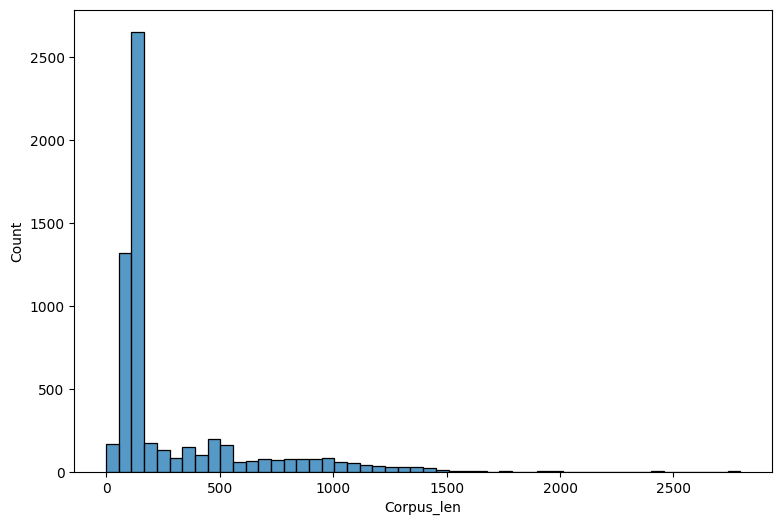

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(df_raw['Corpus_len'], bins=50)

In [ ]:
def parse_date(v):
    if pd.notnull(v):
        try:
            return datetime.strptime(str(v), "%m/%d/%Y")
        except ValueError:
            try:
                return datetime.strptime(str(v), "%Y-%m-%d")
            except ValueError:
                return None
    return None


df_raw['publication_date'] = df_raw['publication_date'].apply(parse_date)


df_raw = df_raw.dropna(subset=['publication_date'])

In [ ]:
df_raw.head()

,Publication_Date,Corpus,Corpus_len
0,2022-03-09,text processing method and model training meth...,125
1,2023-11-02,machine content generation machine content gen...,53
2,2022-05-17,automated apparel design using machine learnin...,95
3,2023-09-05,temporal topic machine learning operation temp...,83
4,2023-09-12,ranked insight machine learning operation rank...,83


In [ ]:
df_raw['publication_date'] = df_raw['publication_date'].apply(
    lambda v: v.replace(hour=0, minute=0, second=0) if pd.notnull(v) else None
)

**Embedding**

In [ ]:
from sentence_transformers import SentenceTransformer


model_id = "sentence-transformers/LaBSE"
embedding_model = SentenceTransformer(model_id)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
Patent_embeddings = embedding_model.encode(df_raw['Corpus'].values, show_progress_bar=True)

Batches:   0%|          | 0/188 [00:00<?, ?it/s]

In [ ]:
Patent_embeddings.shape

(6009, 768)

## Dim Reduction

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=6, n_components=6,
                  min_dist=0.0, metric='cosine',
                  random_state=101)

## Clustering

In [ ]:
from hdbscan import HDBSCAN



hdbscan_model = HDBSCAN(min_cluster_size=10,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


nltk.download('stopwords')

stop_words = list(stopwords.words('english'))
vectorizer_model = CountVectorizer(
    stop_words=stop_words,

    analyzer='word',
    ngram_range=(1, 3)

)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Topic Representer

In [ ]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

In [49]:
from bertopic import BERTopic

topic_model = BERTopic(
    # Pipeline models
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    # Hyperparameters
    top_n_words=10,
    verbose=True
)

topics, probs =  topic_model.fit_transform(
    df_raw['Corpus'].values,
    Patent_embeddings
)

2024-06-01 17:31:52,346 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-01 17:32:16,840 - BERTopic - Dimensionality - Completed ✓
2024-06-01 17:32:16,848 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-01 17:32:17,708 - BERTopic - Cluster - Completed ✓
2024-06-01 17:32:17,730 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-01 17:37:17,147 - BERTopic - Representation - Completed ✓


In [50]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,1586,-1_methods_systems_system_method,"[methods, systems, system, method, using, syst...","[machine, methods systems, system, method syst...",[systems and methods for generating alimentary...
1,0,883,0_number_data_ai_first,"[number, data, ai, first, signal, one, model, ...","[number, number number, digital, data, one, ai...",[fir digital filter for high speed communicati...
2,1,455,1_intelligence_artificial intelligence_artific...,"[intelligence, artificial intelligence, artifi...","[intelligence artificielle et, intelligence ar...",[systã me et procã dã pour gã rer et distribue...
3,2,421,2_variational_encoder_variational auto_variati...,"[variational, encoder, variational auto, varia...","[auto encoder method, variational automatic en...",[image anomaly detection method based on varia...
4,3,400,3_neural_neural network_network_networks,"[neural, neural network, network, networks, ge...","[neural architecture search, neural network ar...",[neural architecture search neural architectur...
...,...,...,...,...,...,...
86,85,11,85_using context information_text speech proce...,"[using context information, text speech proces...","[using context information, text speech proces...",[text to speech processing using previously sp...
87,86,11,86_system artificial intelligence_system artif...,"[system artificial intelligence, system artifi...","[system artificial intelligence, artificial in...",[artificial intelligence voice interactive sys...
88,87,11,87_methods transforming_systems methods transf...,"[methods transforming, systems methods transfo...","[audio content systems, content systems method...",[systems and methods for transforming digitial...
89,88,10,88_interface analysis implementations_solution...,"[interface analysis implementations, solution ...","[implementations solution automation, automate...",[web application test script generation to tes...


In [51]:
topic_model.visualize_heatmap()

In [52]:
topic_model.visualize_topics()

In [53]:
topics_per_class = topic_model.topics_per_class(
    df_raw['Corpus'].values,
    classes=df_raw['assignee'].values,
)

3452it [20:28,  2.81it/s]


In [64]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10)

In [57]:
topics_over_time = topic_model.topics_over_time(
    df_raw['Corpus'].values,
    df_raw['publication_date'].values
)

2024-06-01 18:27:22,044 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 1708) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 
1708it [12:42,  2.24it/s]


In [58]:
topic_model.visualize_topics_over_time(
    topics_over_time,
    topics=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
)

In [59]:
hierarchical_topics = topic_model.hierarchical_topics(
    df_raw['Corpus'].values
)

100%|██████████| 89/89 [00:02<00:00, 30.68it/s]


In [65]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

In [66]:
model_id = "sentence-transformers/LaBSE"
topic_model.save("/content/patent", serialization="safetensors",
                 save_ctfidf=True, save_embedding_model=model_id)

loaded_model = BERTopic.load("/content/jamal/patent")